<a href="https://colab.research.google.com/github/john-lenci-bianchi/Natural-Language-Processing-with-Disaster-Tweets/blob/main/Disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with Disaster Tweets

Link to competition: https://www.kaggle.com/c/nlp-getting-started/overview

## Aim of the project

The competition "Getting Started" is proposed as a task suitable for "novices" in the field of natural language processing. This is due, on the one hand, to the small size of the datasets provided and, on the other hand, to the binary classification task which is certainly more accessible if compared to multi-level classification. 

The goal of this competition is, starting from a training dataset and an evaluation dataset, to realize a model, based on machine learning, able to distinguish between tweets that refer to a real disaster situation (natural disaster or other kind of anomaly/emergency) and those that are not.

This project illustrates the realization of two different models both able to operate this classification task: the first one, based on a traditional approach, uses the technique of feature engineering while the second one uses the Bert language model through Simple Transformers library.


## Work environment preparation

In [ ]:
# Connect the files in the drive (to get access to the datasets) and install simpletransformers. 
# Restart the Runtime
# Set GPU as runtime.
# Restart the Runtime again

from google.colab import drive
drive.mount('/content/drive')
!pip install tweet-preprocessor
!pip install ekphrasis
import nltk
nltk.download('stopwords')
import pandas as pd
print("Done")

Mounted at /content/drive
     |████████████████████████████████| 80 kB 5.3 MB/s 
     |████████████████████████████████| 179 kB 22.4 MB/s 
     |████████████████████████████████| 64 kB 2.5 MB/s 
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-py3-none-any.whl size=82843 sha256=50c93c29960723b3608e0270d4e957cfd8e98dbf280bcc58806121b2c513b682
  Stored in directory: /root/.cache/pip/wheels/f7/ec/0d/12659e32faf780546945d0120f2c8410eb3efb7426731da88f
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41934 sha256=a3a709c075279990efbabd7c6250ccfee199851b8ea47868aae9849ed2babe47
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ekphrasis ftfy
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Done


## Analysis of source data

In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/train.csv')

test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/test_con_target.csv')

In [ ]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
 4   target    3263 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 127.6+ KB


,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1


In [ ]:
print("Unique values of the column \"keyword\" within the training dataset:")
train.keyword.unique()

Unique values of the column "keyword" within the training dataset:


array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [ ]:
print("Unique values of the keyword column within the evaluation dataset.:")
test.keyword.unique()

Unique values of the keyword column within the evaluation dataset.:


array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [ ]:
# Information about null values:

# In the training datset

percent_missing_train = train.isnull().sum() * 100 / len(train)

total_missing_train = train.isnull().sum()

print("Null values in the training dataset")
print("\n")
print("percentage:")
print("\n")
print(percent_missing_train)
print("\n")
print("in total number:")
print("\n")
print(total_missing_train)
print("\n")
print("\n")


# In the test datset

percent_missing_test = test.isnull().sum() * 100 / len(test)

total_missing_test = test.isnull().sum()

print("Null values in the evaluation dataset")
print("\n")
print("percentage:")
print("\n")
print(percent_missing_test)
print("\n")
print("in total number:")
print("\n")
print(total_missing_test)

Null values in the training dataset


percentage:


id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64


in total number:


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64




Null values in the evaluation dataset


percentage:


id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
target       0.000000
dtype: float64


in total number:


id             0
keyword       26
location    1105
text           0
target         0
dtype: int64


In [ ]:
# Counting occurrences of true and false disaster in the training dataset

train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Counting occurrences of true and false disaster in the evaluation dataset
test['target'].value_counts()

0    1861
1    1402
Name: target, dtype: int64

# Preprocessing

In [ ]:
import re
import numpy as np

# Decoding of HTML encoded characters

import html

train['text'] = train['text'].apply(html.unescape)
test['text'] = test['text'].apply(html.unescape)

# Removing Links

train['preprocessed'] = train['text'].replace(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', regex=True)
test['preprocessed'] = test['text'].replace(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', regex=True)

# Hastag management

from ekphrasis.classes.segmenter import Segmenter

train['hashtag'] = train['preprocessed'].apply(lambda x: re.findall(r"#(\w+)", x))
test['hashtag'] = test['preprocessed'].apply(lambda x: re.findall(r"#(\w+)", x))


# Hashtag segmentation using "word statistics from Twitter"


seg_tw = Segmenter(corpus="twitter")
a = []
for i in range(len(train)):
  if train['hashtag'][i] != a:
    listToStr1 = ' '.join([str(elem) for elem in train['hashtag'][i]])
    train.loc[i,'hashtag'] = seg_tw.segment(listToStr1)

a = []
for i in range(len(test)):
  if test['hashtag'][i] != a:
    listToStr1 = ' '.join([str(elem) for elem in test['hashtag'][i]])
    test.loc[i,'hashtag'] = seg_tw.segment(listToStr1)

# Mentions management

train['mentions'] = train['preprocessed'].apply(lambda x: re.findall(r"@(\w+)", x))
test['mentions'] = test['preprocessed'].apply(lambda x: re.findall(r"@(\w+)", x))

a = []
for i in range(len(train)):
  if train['mentions'][i] != a:
    listToStr1 = ' '.join([str(elem) for elem in train['mentions'][i]])
    train.loc[i,'mentions'] = seg_tw.segment(listToStr1)

a = []
for i in range(len(test)):
  if test['mentions'][i] != a:
    listToStr1 = ' '.join([str(elem) for elem in test['mentions'][i]])
    test.loc[i,'mentions'] = seg_tw.segment(listToStr1)



#Removing punctuation and numbers within the "location" and "keyword" columns

train['preprocessed'] = train['preprocessed'].replace(r'[^a-zA-Z\s]+?', ' ', regex=True)
train['location'] = train['location'].replace(r'[^a-zA-Z\s]+?', ' ', regex=True)
train['keyword'] = train['keyword'].replace(r'[^a-zA-Z\s]+?', ' ', regex=True)

test['preprocessed'] = test['preprocessed'].replace(r'[^a-zA-Z\s]+?', ' ', regex=True)
train['location'] = train['location'].replace(r'[^a-zA-Z\s]+?', ' ', regex=True)
train['keyword'] = train['keyword'].replace(r'[^a-zA-Z\s]+?', ' ', regex=True)

# "tweet-preprocessor" for a preliminary preprocessing action

import preprocessor as p

train['preprocessed'] = train['preprocessed'].apply(p.clean)
test['preprocessed'] = test['preprocessed'].apply(p.clean)


# "Spacy" to complete the preprocessing operation


import spacy
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
from nltk.corpus import stopwords
stops = stopwords.words("english")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


train['preprocessed'] = train['preprocessed'].apply(normalize, lowercase=True, remove_stopwords=True)
test['preprocessed'] = test['preprocessed'].apply(normalize, lowercase=True, remove_stopwords=True)


# Removing the tag "-PRON-" that is inserted by the Spacy preprocessing action. 


train['preprocessed'] = train['preprocessed'].str.replace('-PRON-',' ')
test['preprocessed'] = test['preprocessed'].str.replace('-PRON-',' ')

# Removing the special character "\ufeff1" that for some reason escapes the previous controls

train['preprocessed'] = train['preprocessed'].str.replace('\ufeff1',' ')
test['preprocessed'] = test['preprocessed'].str.replace('\ufeff1',' ')

# Correction all u's in "you"

train['preprocessed'] = train['preprocessed'].str.replace(' u ',' you ')
test['preprocessed'] = test['preprocessed'].str.replace(' u ',' you ')

# Removing leading and trailing spaces

train['preprocessed'] = train['preprocessed'].str.strip()
test['preprocessed'] = test['preprocessed'].str.strip()

# Removing punctuation and numbers in Tweets and Mentions

train['mentions'] = train['mentions'].astype(str).str.replace(r'[^a-zA-Z\s]+?', ' ', regex=True)
test['mentions'] = test['mentions'].astype(str).str.replace(r'[^a-zA-Z\s]+?', ' ', regex=True)

train['hashtag'] = train['hashtag'].astype(str).str.replace(r'[^a-zA-Z\s]+?', ' ', regex=True)
test['hashtag'] = test['hashtag'].astype(str).str.replace(r'[^a-zA-Z\s]+?', ' ', regex=True)

# Replacement cells formed only by spaces with the value "NaN".

train = train.replace(r'^\s*$', np.nan, regex=True)
test = test.replace(r'^\s*$', np.nan, regex=True)

# This last condition is used to prevent null values in the "preprocessed" column.

train['preprocessed'] = train['preprocessed'].replace(np.nan, " ")
test['preprocessed'] = test['preprocessed'].replace(np.nan, " ")

# Transformation in lowercase the text of the column "preprocessed".

train['preprocessed'] = train['preprocessed'].str.lower()
test['preprocessed'] = test['preprocessed'].str.lower()

# Removing hashtags and mentions shorter than two characters

train['hashtag'] = train['hashtag'].astype(str).str.replace(r'\b\w{1}\b', ' ', regex=True)
train['mentions'] = train['mentions'].astype(str).str.replace(r'\b\w{1}\b', ' ', regex=True)

test['hashtag'] = test['hashtag'].astype(str).str.replace(r'\b\w{1}\b', ' ', regex=True)
test['mentions'] = test['mentions'].astype(str).str.replace(r'\b\w{1}\b', ' ', regex=True)

print("Done")

Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Done


In [ ]:
train.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/pre_train.csv', header=True)
test.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/pre_test.csv', header=True)

CHECKPOINT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/pre_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/pre_test.csv')

# Data understanding

I use NLTK to get text statistics

Most frequent words in the two datasets:

In [ ]:
import nltk
nltk.download('punkt')

# Consider Tweets to be sentences because of the very random punctuation
train_text = ""

for i in range(len(train)):
  train_text = train_text  + ''.join([str(elem) for elem in train['preprocessed'][i]])+ " "

test_text = ""

for i in range(len(test)):
  test_text = test_text  + ''.join([str(elem) for elem in test['preprocessed'][i]])+ " "

train_tokenized_words = nltk.word_tokenize(train_text)
test_tokenized_words = nltk.word_tokenize(test_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train_freq_dist = nltk.FreqDist(train_tokenized_words)
test_freq_dist = nltk.FreqDist(test_tokenized_words)

print("Ranking of the most frequent words in the Train dataset")
train_freq_dist.most_common(40)

Ranking of the most frequent words in the Train dataset


[('get', 443),
 ('like', 394),
 ('fire', 362),
 ('much', 335),
 ('go', 326),
 ('new', 234),
 ('bomb', 230),
 ('via', 220),
 ('news', 213),
 ('one', 209),
 ('people', 201),
 ('say', 200),
 ('see', 184),
 ('time', 183),
 ('burn', 183),
 ('year', 178),
 ('make', 178),
 ('kill', 178),
 ('video', 175),
 ('flood', 167),
 ('crash', 165),
 ('disaster', 162),
 ('come', 160),
 ('emergency', 158),
 ('would', 155),
 ('body', 155),
 ('attack', 154),
 ('day', 149),
 ('man', 148),
 ('look', 144),
 ('home', 144),
 ('police', 142),
 ('take', 141),
 ('know', 138),
 ('good', 137),
 ('think', 136),
 ('love', 135),
 ('family', 132),
 ('train', 129),
 ('still', 128)]

Graph of the most frequent words in the Train dataset


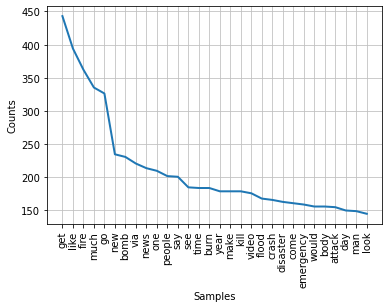

In [ ]:
print("Graph of the most frequent words in the Train dataset")

train_freq_dist.plot(30)

In [ ]:
print("Ranking of most frequent words in the Test dataset")
test_freq_dist.most_common(40)

Ranking of most frequent words in the Test dataset


[('get', 198),
 ('fire', 170),
 ('like', 165),
 ('go', 148),
 ('much', 144),
 ('new', 107),
 ('via', 105),
 ('news', 101),
 ('bomb', 100),
 ('one', 90),
 ('say', 86),
 ('people', 85),
 ('would', 85),
 ('attack', 85),
 ('see', 81),
 ('burn', 80),
 ('take', 76),
 ('year', 76),
 ('kill', 74),
 ('emergency', 73),
 ('time', 72),
 ('make', 71),
 ('watch', 69),
 ('crash', 68),
 ('think', 68),
 ('flood', 66),
 ('disaster', 65),
 ('video', 64),
 ('come', 62),
 ('service', 59),
 ('police', 57),
 ('storm', 57),
 ('suicide', 57),
 ('love', 56),
 ('live', 55),
 ('day', 54),
 ('know', 54),
 ('body', 54),
 ('still', 52),
 ('us', 52)]

Graph of most frequent words in the Test dataset


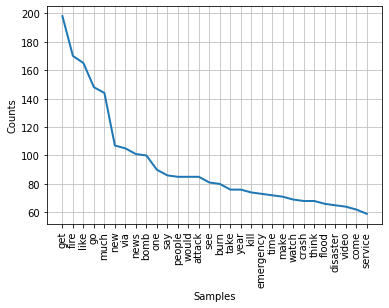

In [ ]:
print("Graph of most frequent words in the Test dataset")

test_freq_dist.plot(30)

## Most frequent words in cases of TRUE disaster in both datasets

In [ ]:
# Tweets are considered to be sentences because of the very random punctuation

real_disaster_text = ""

for i in range(len(train)):
  if train['target'][i] == 1:
    real_disaster_text = real_disaster_text  + ''.join([str(elem) for elem in train['preprocessed'][i]])+ " "
    

for i in range(len(test)):
  if test['target'][i] == 1:
    real_disaster_text = real_disaster_text  + ''.join([str(elem) for elem in test['preprocessed'][i]])+ " "

fake_disaster_text = ""

for i in range(len(train)):
  if train['target'][i] == 0:
    fake_disaster_text = fake_disaster_text  + ''.join([str(elem) for elem in train['preprocessed'][i]])+ " "

for i in range(len(test)):
  if test['target'][i] == 0:
    fake_disaster_text = fake_disaster_text  + ''.join([str(elem) for elem in test['preprocessed'][i]])+ " "


real_disaster_words = nltk.word_tokenize(real_disaster_text)
fake_disaster_words = nltk.word_tokenize(fake_disaster_text)

real_disaster_freq_dist = nltk.FreqDist(real_disaster_words)
fake_disaster_freq_dist = nltk.FreqDist(fake_disaster_words)

print("# Ranking of the most frequent words in real disaster cases")

real_disaster_freq_dist.most_common(30)

# Ranking of the most frequent words in real disaster cases


[('fire', 403),
 ('bomb', 257),
 ('news', 231),
 ('much', 226),
 ('kill', 223),
 ('via', 183),
 ('get', 182),
 ('flood', 172),
 ('disaster', 170),
 ('attack', 165),
 ('suicide', 165),
 ('year', 160),
 ('crash', 153),
 ('people', 151),
 ('police', 150),
 ('california', 149),
 ('train', 147),
 ('like', 146),
 ('hiroshima', 146),
 ('family', 143),
 ('go', 142),
 ('home', 137),
 ('storm', 137),
 ('say', 128),
 ('burn', 125),
 ('pm', 118),
 ('emergency', 114),
 ('wildfire', 108),
 ('collapse', 107),
 ('live', 106)]

Graph of the most frequent words in cases of real disaster


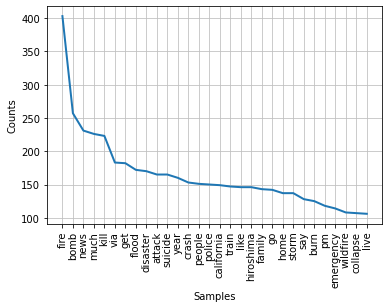

In [ ]:
print("Graph of the most frequent words in cases of real disaster")

real_disaster_freq_dist.plot(30)

## Most frequent words in FALSE disaster cases in both datasets.

In [ ]:
print("Ranking of most frequent words in false disaster cases in both datasets")

fake_disaster_freq_dist.most_common(30)

Ranking of most frequent words in false disaster cases in both datasets


[('get', 459),
 ('like', 413),
 ('go', 332),
 ('much', 253),
 ('new', 246),
 ('one', 197),
 ('make', 181),
 ('see', 180),
 ('would', 168),
 ('love', 166),
 ('body', 160),
 ('think', 158),
 ('say', 158),
 ('time', 153),
 ('bag', 153),
 ('come', 149),
 ('scream', 145),
 ('video', 142),
 ('via', 142),
 ('know', 140),
 ('good', 140),
 ('day', 139),
 ('burn', 138),
 ('people', 135),
 ('want', 133),
 ('fire', 129),
 ('take', 127),
 ('well', 125),
 ('full', 121),
 ('let', 121)]

Graph most frequent words in false disaster cases in both datasets


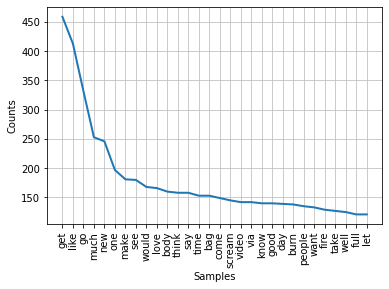

In [ ]:
print("Graph most frequent words in false disaster cases in both datasets")

fake_disaster_freq_dist.plot(30)

## Data about #Hashtags and @Mentions


In [ ]:
train_HM = ""

for i in range(len(train)):
  if str(train['hashtag'][i]) != "nan":
    train_HM = train_HM  + ''.join([str(elem) for elem in str(train['hashtag'][i])])+ " "

for i in range(len(train)):
    if str(train['mentions'][i]) != "nan":
      train_HM = train_HM  + ''.join([str(elem) for elem in str(train['mentions'][i])])+ " "

test_HM = ""

for i in range(len(test)):
  if str(test['hashtag'][i]) != "nan":
    test_HM = train_HM  + ''.join([str(elem) for elem in str(test['hashtag'][i])])+ " "

for i in range(len(test)):
  if str(test['mentions'][i]) != "nan":
    test_HM = train_HM  + ''.join([str(elem) for elem in str(test['mentions'][i])])+ " "
    
train_tokenized_HM = nltk.word_tokenize(train_HM)
test_tokenized_HM = nltk.word_tokenize(test_HM)

train_HM_freq_dist = nltk.FreqDist(train_tokenized_HM)
test_HM_freq_dist = nltk.FreqDist(test_tokenized_HM)


print("Ranking of the most frequent Hashtags and Mentions in the Train dataset")
train_HM_freq_dist.most_common(40)

Ranking of the most frequent Hashtags and Mentions in the Train dataset


[('news', 188),
 ('tube', 93),
 ('you', 86),
 ('the', 79),
 ('hot', 34),
 ('best', 33),
 ('in', 30),
 ('prebreak', 30),
 ('now', 29),
 ('world', 25),
 ('hiroshima', 24),
 ('us', 23),
 ('islam', 23),
 ('playing', 22),
 ('fire', 21),
 ('music', 20),
 ('on', 19),
 ('gbbo', 19),
 ('bbc', 19),
 ('breaking', 17),
 ('storm', 17),
 ('love', 17),
 ('to', 17),
 ('job', 17),
 ('emmerdale', 17),
 ('earthquake', 16),
 ('india', 16),
 ('free', 16),
 ('up', 15),
 ('iran', 15),
 ('usa', 15),
 ('of', 14),
 ('jobs', 14),
 ('god', 14),
 ('dc', 14),
 ('team', 14),
 ('abc', 14),
 ('id', 13),
 ('radio', 13),
 ('real', 13)]

Graph of the most frequent Hashtags and Mentions in the Train dataset


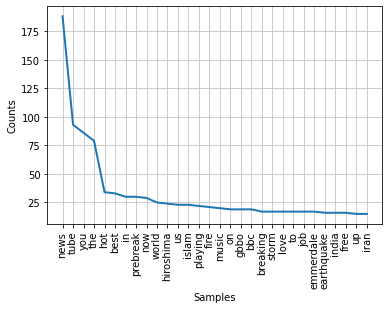

In [ ]:
print("Graph of the most frequent Hashtags and Mentions in the Train dataset")
train_HM_freq_dist.plot(30)

In [ ]:
print("Ranking Hashtags and Mentions more frequent in the dataset of Test")
test_HM_freq_dist.most_common(40)

Ranking Hashtags and Mentions more frequent in the dataset of Test


[('news', 188),
 ('tube', 93),
 ('you', 86),
 ('the', 79),
 ('hot', 34),
 ('best', 33),
 ('in', 30),
 ('prebreak', 30),
 ('now', 29),
 ('world', 25),
 ('hiroshima', 24),
 ('us', 23),
 ('islam', 23),
 ('playing', 22),
 ('fire', 21),
 ('music', 20),
 ('on', 19),
 ('gbbo', 19),
 ('bbc', 19),
 ('breaking', 17),
 ('storm', 17),
 ('love', 17),
 ('to', 17),
 ('job', 17),
 ('emmerdale', 17),
 ('earthquake', 16),
 ('india', 16),
 ('free', 16),
 ('up', 15),
 ('iran', 15),
 ('usa', 15),
 ('of', 14),
 ('jobs', 14),
 ('god', 14),
 ('dc', 14),
 ('team', 14),
 ('abc', 14),
 ('id', 13),
 ('radio', 13),
 ('real', 13)]

Graph of the most frequent Hashtags and Mentions in the Test dataset


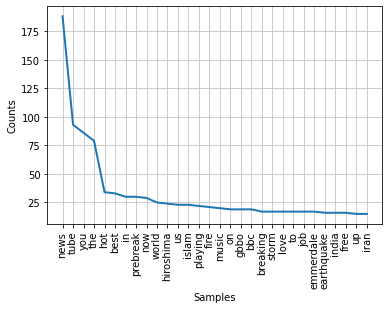

In [ ]:
print("Graph of the most frequent Hashtags and Mentions in the Test dataset")

test_HM_freq_dist.plot(30)

## Hashtags and Mentions more frequent in the cases of TRUE disaster in both the dataset

In [ ]:
real_disaster_HM = ""

for i in range(len(train)):
  if str(train['hashtag'][i]) != "nan":
    if train['target'][i] == 1:
      real_disaster_HM = real_disaster_HM  + ''.join([str(elem) for elem in str(train['hashtag'][i])])+ " "

for i in range(len(train)):
  if str(train['mentions'][i]) != "nan":
    if train['target'][i] == 1:
      real_disaster_HM = real_disaster_HM  + ''.join([str(elem) for elem in str(train['mentions'][i])])+ " "


for i in range(len(test)):
  if str(test['hashtag'][i]) != "nan":
    if test['target'][i] == 1:
      real_disaster_HM = real_disaster_HM  + ''.join([str(elem) for elem in str(test['hashtag'][i])])+ " "

for i in range(len(test)):
  if str(test['mentions'][i]) != "nan":
    if test['target'][i] == 1:
      real_disaster_HM = real_disaster_HM  + ''.join([str(elem) for elem in str(test['mentions'][i])])+ " "

fake_disaster_HM = ""

for i in range(len(train)):
  if str(train['hashtag'][i]) != "nan":
    if train['target'][i] == 0:
      fake_disaster_HM = fake_disaster_HM  + ''.join([str(elem) for elem in str(train['hashtag'][i])])+ " "

for i in range(len(train)):
  if str(train['mentions'][i]) != "nan":
    if train['target'][i] == 0:
     fake_disaster_HM = fake_disaster_HM  + ''.join([str(elem) for elem in str(train['mentions'][i])])+ " "

for i in range(len(test)):
  if str(test['hashtag'][i]) != "nan":
    if test['target'][i] == 0:
     fake_disaster_HM = fake_disaster_HM  + ''.join([str(elem) for elem in str(test['hashtag'][i])])+ " "

for i in range(len(test)):
  if str(test['mentions'][i]) != "nan":
    if test['target'][i] == 0:
      fake_disaster_HM = fake_disaster_HM  + ''.join([str(elem) for elem in str(test['mentions'][i])])+ " "


real_disaster_words_HM = nltk.word_tokenize(real_disaster_HM)
fake_disaster_words_HM = nltk.word_tokenize(fake_disaster_HM)

real_disaster_freq_dist_HM = nltk.FreqDist(real_disaster_words_HM)
fake_disaster_freq_dist_HM = nltk.FreqDist(fake_disaster_words_HM)

print("Ranking of most frequent words in cases of True disaster")

real_disaster_freq_dist_HM.most_common(30)

Ranking of most frequent words in cases of True disaster


[('news', 193),
 ('the', 45),
 ('hiroshima', 40),
 ('world', 33),
 ('fire', 25),
 ('breaking', 25),
 ('you', 24),
 ('tube', 23),
 ('earthquake', 22),
 ('storm', 22),
 ('us', 19),
 ('yyc', 19),
 ('india', 18),
 ('bbc', 18),
 ('japan', 17),
 ('in', 16),
 ('hot', 16),
 ('prebreak', 16),
 ('best', 16),
 ('abc', 16),
 ('weather', 14),
 ('fukushima', 14),
 ('nuclear', 14),
 ('isis', 13),
 ('genocide', 13),
 ('terrorism', 13),
 ('iran', 12),
 ('on', 12),
 ('mh', 12),
 ('sismo', 12)]

Graph most frequent words in cases of True disaster


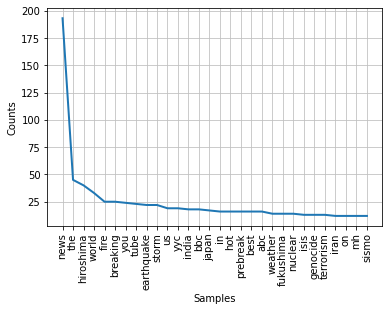

In [ ]:
print("Graph most frequent words in cases of True disaster")

real_disaster_freq_dist_HM.plot(30)

## Hashtags and Mentions more frequent in the cases of FALSE disaster in both the dataset

In [ ]:
print("Ranking of most frequent words in False Disaster cases")

fake_disaster_freq_dist_HM.most_common(30)

Ranking of most frequent words in False Disaster cases


[('tube', 105),
 ('you', 99),
 ('the', 82),
 ('news', 62),
 ('hot', 32),
 ('best', 30),
 ('now', 29),
 ('music', 26),
 ('emmerdale', 25),
 ('prebreak', 25),
 ('playing', 24),
 ('in', 23),
 ('mtv', 20),
 ('job', 20),
 ('it', 19),
 ('love', 17),
 ('real', 17),
 ('is', 17),
 ('gbbo', 17),
 ('change', 17),
 ('on', 17),
 ('summer', 16),
 ('of', 16),
 ('jobs', 16),
 ('islam', 16),
 ('up', 15),
 ('hiring', 15),
 ('radio', 15),
 ('team', 14),
 ('mike', 14)]

Graph most frequent words in cases of False Disaster


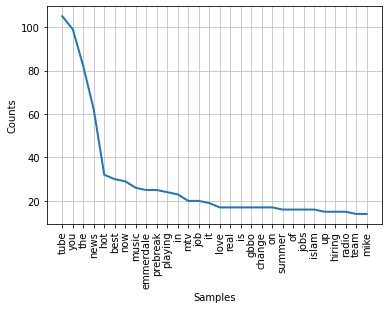

In [ ]:
print("Graph most frequent words in cases of False Disaster")

fake_disaster_freq_dist_HM.plot(30)

## Other data about the text




In [ ]:
# Train Dataset

train['word_count'] = train["preprocessed"].apply(lambda x: len(str(x).split(" ")))
train['char_count'] = train["preprocessed"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
train['avg_word_length'] = train['char_count'] / train['word_count']
train['avg_sentence_lenght'] = train['word_count'] / 1
train.head()

,Unnamed: 0,id,keyword,location,text,target,preprocessed,hashtag,mentions,word_count,char_count,avg_word_length,avg_sentence_lenght
0,0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive us,earthquake,NaN,7,37,5.285714,7.0
1,1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,NaN,NaN,7,31,4.428571,7.0
2,2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,NaN,NaN,11,69,6.272727,11.0
3,3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,wildfires,NaN,6,46,7.666667,6.0
4,4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get send photo ruby alaska smoke wildfire pour...,alaska wildfires,NaN,9,45,5.000000,9.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

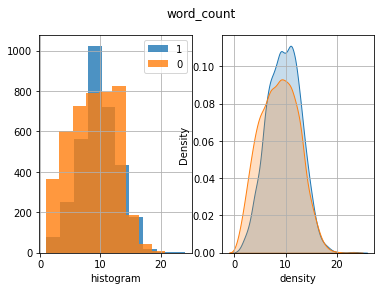

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

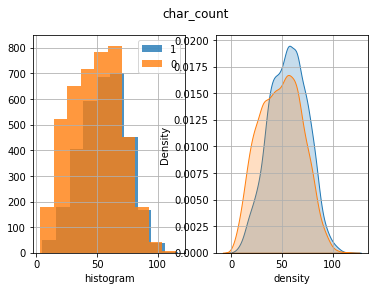

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

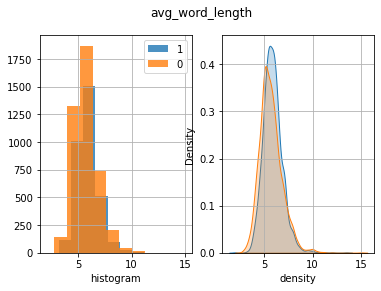

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

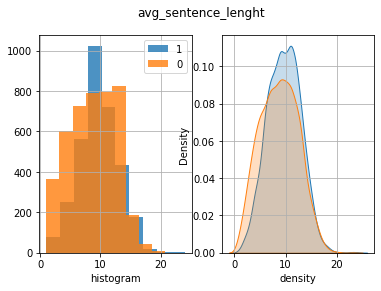

In [ ]:
## Create charts on newly generated data

import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

x, y = "word_count", "target"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in train[y].unique():
    sns.distplot(train[train[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(train[train[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(train[y].unique())
ax[1].grid(True)
plt.show()

x, y = "char_count", "target"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in train[y].unique():
    sns.distplot(train[train[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(train[train[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(train[y].unique())
ax[1].grid(True)
plt.show()


x, y = "avg_word_length", "target"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in train[y].unique():
    sns.distplot(train[train[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(train[train[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(train[y].unique())
ax[1].grid(True)
plt.show()


x, y = "avg_sentence_lenght", "target"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in train[y].unique():
    sns.distplot(train[train[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(train[train[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(train[y].unique())
ax[1].grid(True)
plt.show()

Saving data in two new files

In [ ]:
train.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/clean_train.csv', header=True)
test.to_csv (r'/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/clean_test.csv', header=True)

CHECKPOINT

NLTK version update to allow correct execution of "*nltk.ngrams*" method

In [ ]:
import nltk
print('The nltk version is {}.'.format(nltk.__version__))
!pip install nltk==3.4

The nltk version is 3.2.5.
     |████████████████████████████████| 1.4MB 39.4MB/s 
  Created wheel for nltk: filename=nltk-3.4-cp37-none-any.whl size=1436399 sha256=125f34d6c92276e2ceaedd73f4ecd0db29234fd2490ac035369def849911d381
  Stored in directory: /root/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import nltk
print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.4.


Importing files containing preprocessed data

In [ ]:
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')


train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/clean_train.csv')
eval_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/clean_test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Definition of the functions that will be used for the Feature Engineering operation


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

stopword_list = stopwords.words('english')

from collections import defaultdict
tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV
lemmatizer = WordNetLemmatizer()

doc_counter = 0
def reset_counter():
  global doc_counter
  doc_counter = 0

def increase_counter():
  global doc_counter
  doc_counter += 1
  if doc_counter % 100 == 0:
    print(doc_counter)

def nltk_ngram_tokenizer(text):
    increase_counter()

    # tokens, skipping stopwords
    tokens = [token for token in word_tokenize(text) if token not in stopword_list]

    # we use a simple nltk function to create ngrams
    bigrams = ['BI_'+w1+'_'+w2 for w1,w2 in nltk.ngrams(tokens,2)]
    trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(tokens,3)]

    all_tokens = list()
    all_tokens.extend(tokens)
    all_tokens.extend(bigrams)
    all_tokens.extend(trigrams)
    return all_tokens

def nltk_nlp_tokenizer(text):
    increase_counter()

    # tokens, skipping stopwords
    tokens = [token for token in word_tokenize(text) if token not in stopword_list]

    # lemmatized tokens
    lemmas = list()
    for token, tag in pos_tag(tokens):
  	    lemmas.append('LEMMA_'+lemmatizer.lemmatize(token, tag_map[tag[0]]))

    # we use a simple nltk function to create ngrams
    lemma_bigrams = ['BI_'+p1+'_'+p2 for p1,p2 in nltk.ngrams(lemmas,2)]
    lemma_trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(lemmas,3)]

    all_tokens = list()
    all_tokens.extend(lemmas)
    all_tokens.extend(lemma_bigrams)
    all_tokens.extend(lemma_trigrams)
    return all_tokens

import spacy
import re
nlp = spacy.load('en_core_web_sm')

def spacy_nlp_tokenizer(text):
    increase_counter()

    # substituting all space characters with a single space
    text = re.sub('\s+', ' ', text)

    # we use spacy for main nlp tasks
    doc = nlp(text)
    # lemmatized tokens, skipping stopwords
    lemmas = ['LEMMA_'+token.lemma_ for token in doc if not token.is_stop]
    # entity_types
    entity_types = ['NER_'+token.ent_type_ for token in doc if token.ent_type_]

    # in case an entity linker is available, we can use it do put actual entities as
    # features, e.g. Queen Elizabeth, Elizabeth II, Her Majesty -> KB2912
    # see https://spacy.io/usage/training#entity-linker
    # entities = ['ENT_'+token.ent_kb_id_ for token in doc if token.ent_kb_id_]

    # we use a simple nltk function to create ngrams
    lemma_bigrams = ['BI_'+p1+'_'+p2 for p1,p2 in nltk.ngrams(lemmas,2)]
    lemma_trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(lemmas,3)]
    all_tokens = list()
    all_tokens.extend(lemmas)
    all_tokens.extend(lemma_bigrams)
    all_tokens.extend(lemma_trigrams)
    all_tokens.extend(entity_types)
    return all_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Feature engineering

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

In [ ]:
# Getting an array of booleans from the "target" column

import numpy as np

y_train_bin = np.asarray(train_df["target"])==1
y_test_bin = np.asarray(eval_df["target"])==1
y_train_bin,y_test_bin

(array([ True,  True,  True, ...,  True,  True,  True]),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer(analyzer=spacy_nlp_tokenizer)), # Feature extraction
    ('sel', SelectKBest(chi2, k=5000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

pipeline.fit(train_df["preprocessed"],train_df["target"])
predictions = pipeline.predict(eval_df["preprocessed"])
correct = 0
for prediction,true_label in zip(predictions, eval_df["target"]):
    if prediction==true_label:
        correct += 1
print(correct/len(predictions))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
0.7814894269077536


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification report:')
print(classification_report(eval_df["target"], predictions))
print('Confusion matrix:')
cm = confusion_matrix(eval_df["target"], predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1861
           1       0.79      0.67      0.72      1402

    accuracy                           0.78      3263
   macro avg       0.78      0.77      0.77      3263
weighted avg       0.78      0.78      0.78      3263

Confusion matrix:
[[1612  249]
 [ 464  938]]


In [ ]:
vect = CountVectorizer(min_df=3, analyzer=spacy_nlp_tokenizer)  # tokenization and frequency count

X_train_tok = vect.fit_transform(train_df["preprocessed"])

X_test_tok =vect.transform(eval_df["preprocessed"])

10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600
18700
18800
18900
19000
19100
19200
19300
19400
19500
19600
19700
19800
19900
20000
20100
20200
20300
20400
20500
20600
20700
20800
20900
21000
21100
21200
21300
21400
21500
21600
21700


In [ ]:
param_grid = [
    {'sel__k': [1000, 2000, 5000, 'all'], 'learner__C': [0.01, 0.1, 1, 10, 100]},
 ]

opt_pipeline = Pipeline([
#    ('vect', CountVectorizer()),  # feature extraction
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

In [ ]:
from sklearn.model_selection import GridSearchCV

# value indicating how many processors are to be used in parallel
n_jobs = 3

# In this step all parameters defined above are tested.
# "verbose" is used to print the information of this process to the console.
# The number of cross validations has been set to 5 and is used to make this step work better.
# making sure that all possible combinations are tested.

opt_search = GridSearchCV(opt_pipeline, param_grid, cv=5, n_jobs = n_jobs, verbose=True).fit(X_train_tok, train_df["target"])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   12.1s finished


In [ ]:
opt_search.best_params_

{'learner__C': 0.1, 'sel__k': 5000}

In [ ]:
opt_search.cv_results_

{'mean_fit_time': array([0.10751839, 0.12754979, 0.11034575, 0.12490587, 0.10925531,
        0.12570043, 0.12639523, 0.12865891, 0.14144511, 0.15602927,
        0.1507144 , 0.15397215, 0.41358342, 0.42544594, 0.37977777,
        0.42475681, 0.71916609, 0.71525683, 0.66298599, 0.64329462]),
 'mean_score_time': array([0.00391145, 0.00708332, 0.004814  , 0.00854783, 0.00911994,
        0.00476494, 0.0059855 , 0.0064867 , 0.00457683, 0.00695586,
        0.00813165, 0.00589547, 0.00498118, 0.0058166 , 0.00419002,
        0.00505767, 0.00557394, 0.00517488, 0.00555882, 0.00345631]),
 'mean_test_score': array([0.66820224, 0.67450628, 0.66636212, 0.63838342, 0.65296423,
        0.66281735, 0.6888254 , 0.67398117, 0.64232405, 0.65125569,
        0.65743462, 0.64127608, 0.63628127, 0.64560618, 0.62695765,
        0.60147265, 0.63299681, 0.6410099 , 0.59529811, 0.58912643]),
 'param_learner__C': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1,
                    10, 10,

In [ ]:
opt_search.best_estimator_

Pipeline(memory=None,
         steps=[('sel',
                 SelectKBest(k=5000,
                             score_func=<function chi2 at 0x7fc7c92d4830>)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('learner',
                 LinearSVC(C=0.1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [ ]:
opt_predictions = opt_search.best_estimator_.predict(X_test_tok)

correct = 0
for prediction,true_label in zip(opt_predictions, eval_df["target"]):
    if prediction==true_label:
        correct += 1
print(correct/len(opt_predictions))

0.8011032791909286


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification report:')
print(classification_report(eval_df["target"], opt_predictions))
print('Confusion matrix:')
opt_cm = confusion_matrix(eval_df["target"], opt_predictions)
print(opt_cm)

Classification report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1861
           1       0.82      0.68      0.75      1402

    accuracy                           0.80      3263
   macro avg       0.81      0.79      0.79      3263
weighted avg       0.80      0.80      0.80      3263

Confusion matrix:
[[1657  204]
 [ 445  957]]


CHECKPOINT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 225kB 7.2MB/s 
     |████████████████████████████████| 81kB 10.5MB/s 
     |████████████████████████████████| 3.3MB 29.8MB/s 
     |████████████████████████████████| 7.8MB 25.2MB/s 
     |████████████████████████████████| 1.8MB 48.9MB/s 
     |████████████████████████████████| 2.5MB 39.7MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 34.1MB/s 
     |████████████████████████████████| 133kB 58.2MB/s 
     |████████████████████████████████| 266kB 51.3MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 174kB 53.9MB/s 
     |████████████████████████████████| 4.2MB 46.9MB/s 
     |████████████████████████████████| 112kB 48.9MB/s 
     |████████████████████████████████| 143kB 54.5MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 901kB 37.1MB/s 
     |████████████████████████████████| 245kB 54.3MB/

# Simpletrasformer

In [ ]:
# The two csv files obtained in the previous steps are 
# conformed to the transformer input.

import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/clean_train.csv')
eval_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Disaster Tweets/clean_test.csv')

from simpletransformers.classification import (
    ClassificationArgs,
    ClassificationModel,
)

train_df = pd.DataFrame({
     'text': train_df['preprocessed'],
    'label':train_df['target']
})

print(train_df.head())

eval_df = pd.DataFrame({
     'text': eval_df['preprocessed'],
    'label':eval_df['target']
})

print(eval_df.head())

2021-07-12 17:45:33.664934: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


                                                text  label
0        deed reason earthquake may allah forgive us      1
1              forest fire near la ronge sask canada      1
2  resident ask shelter place notify officer evac...      1
3  people receive wildfire evacuation order calif...      1
4  get send photo ruby alaska smoke wildfire pour...      1
                                                text  label
0                          happen terrible car crash      1
1  hear earthquake different city stay safe everyone      1
2  forest fire spot pond goose flee across street...      1
3                  apocalypse light spokane wildfire      1
4                 typhoon soudelor kill china taiwan      1


In [ ]:
#List of available models
#https://huggingface.co/models

from simpletransformers.classification import ClassificationModel
from simpletransformers.classification import ClassificationArgs


# Model configuration
model_args = ClassificationArgs()
# Maximum number of words in a Tweet
model_args.max_seq_length	= 32

model_args.learning_rate = 2e-5
model_args.num_train_epochs = 5

# Overwrite results output folder
model_args.overwrite_output_dir = True


model = ClassificationModel("bert", "bert-base-uncased", args=model_args)

# Train the model
model.train_model(train_df)

result, model_outputs, wrong_predictions = model.eval_model(eval_df)

print("done")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/7613 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/238 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/238 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:936: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  model.parameters(), args.max_grad_norm


Running Epoch 2 of 5:   0%|          | 0/238 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/238 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/238 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1393: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3263 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/408 [00:00<?, ?it/s]

done



## Results present in the file "eval_results.txt" generated in the folder "outputs".



auprc = 0.8628520922486697

auroc = 0.8701020879820874

eval_loss = 0.4480047853773131

fn = 361

fp = 272

mcc = 0.6020058737437448

tn = 1589

tp = 1041

